In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.fft import fft,fftfreq

$$ \ddot{x} + r\dot{x} + \omega _o^2 x + \beta x^3 = f cos \omega t $$

Fazendo mudança de variável:
$$\dot{x} = v$$

Logo

$$ \dot{v} + rv + \omega _0^2 x + \beta x^3 = f cos \omega t $$

Teremos então o seguinte sistema de edo:

$$\begin{align*}
\frac{dv}{dt} &= f cos \omega t - (rv + \omega _0^2 x + \beta x^3) \\
\frac{dx}{dt} &= v
\end{align*}$$

In [18]:
def edo(t,y):
    f = 1
    w = 1
    r = 0.2
    v = y[0]
    x = y[1]
    wo2 = -1
    b = 0.1
    dvdt = f * np.cos(w*t) - (r*v + wo2*x + b*x**3)
    dxdt = v

    return [dvdt,dxdt]

In [19]:
condições_iniciais1 = [0,0] # velocidade e posição
# condições_iniciais2 = [0,0]
t0 = 0
tfinal = 10000
incremento = 0.001
ts = np.arange(t0, tfinal, incremento)


sol1 = solve_ivp(edo,t_span=[t0,tfinal],y0=condições_iniciais1,t_eval=ts)
# sol2 = solve_ivp(edo,t_span=[t0,tfinal],y0=condições_iniciais2,t_eval=ts)

x1 = sol1.y[1]
v1 = sol1.y[0]

# x2 = sol2.y[1]
# v2 = sol2.y[0]

A seguir o gráfico do estado de fase:

Text(0, 0.5, 'x (m)')

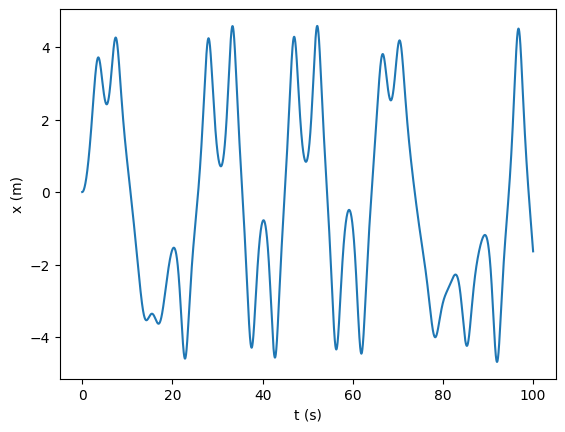

In [20]:
# estado de fase

frames = int(round(tfinal/incremento,0))
Tespecifico = 100
frames_especifico = int(round(frames*Tespecifico/tfinal,0))

plt.plot(ts[:frames_especifico],x1[:frames_especifico])
plt.xlabel('t (s)')
plt.ylabel('x (m)')

Seção de Poincaré abaixo

Text(0.5, 1.0, 'Seção de Poincaré')

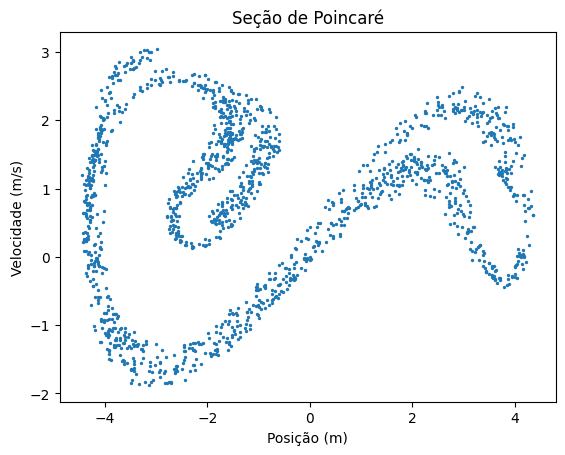

In [21]:
#Poincaré

T = 2 * np.pi  # Período do sistema
indice_poincare = np.arange(0, len(ts), int(T / (ts[1] - ts[0])))
plt.figure()
plt.scatter(x1[indice_poincare], v1[indice_poincare], s=2)
#plt.scatter(x2[indice_poincare], v2[indice_poincare], s=2)
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Seção de Poincaré')

Text(0, 0.5, 'Velocidade (m/s)')

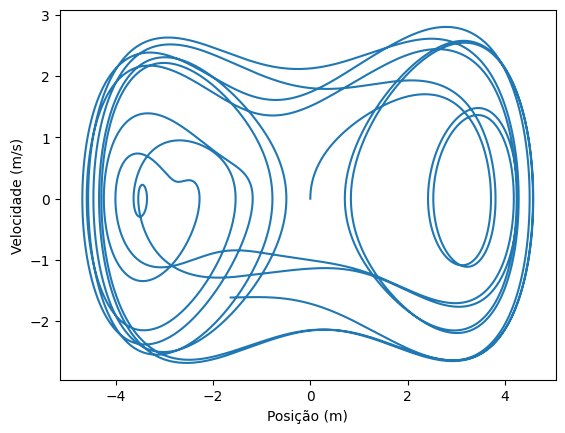

In [22]:
#diagrama de fases 
plt.plot(x1[:frames_especifico],v1[:frames_especifico])
# plt.scatter(x1[indice_poincare], v1[indice_poincare], s=10,c='red')
#plt.plot(x2[:frames_especifico],v2[:frames_especifico])
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')

transformada de fourier

In [23]:
xf = fft(x1)
xfreq = fftfreq(len(ts),incremento)

In [24]:
np.abs(xfreq)

array([0.    , 0.0001, 0.0002, ..., 0.0003, 0.0002, 0.0001])

espectro de potencia $$ P(\omega) = |F(\omega)|^2 $$

Grafico ajustando o limite nas ordenadas

[]

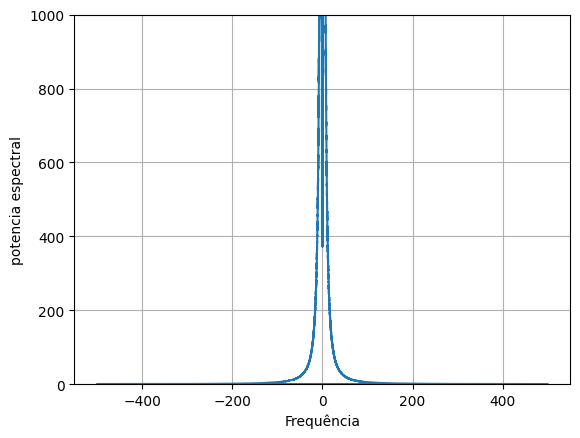

In [25]:
plt.plot(xfreq,np.abs(xf)**2)
plt.xlabel('Frequência')
plt.ylabel("potencia espectral")

plt.ylim(0,1000)
plt.grid(True)
plt.plot()

gráfico sem setar um ylim

[]

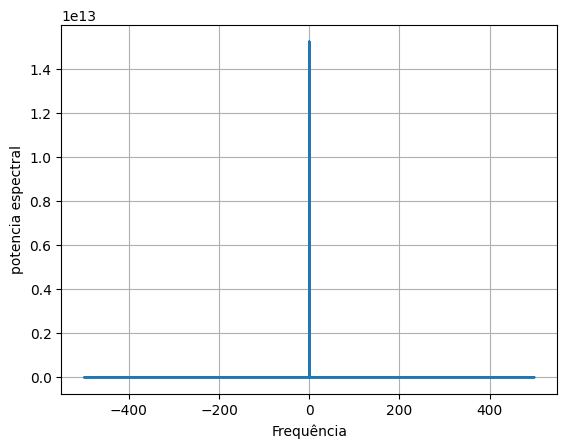

In [26]:
plt.plot(xfreq,np.abs(xf)**2)
plt.xlabel('Frequência')
plt.ylabel("potencia espectral")

plt.grid(True)
plt.plot()

gráfico log de $P(\omega)$


[]

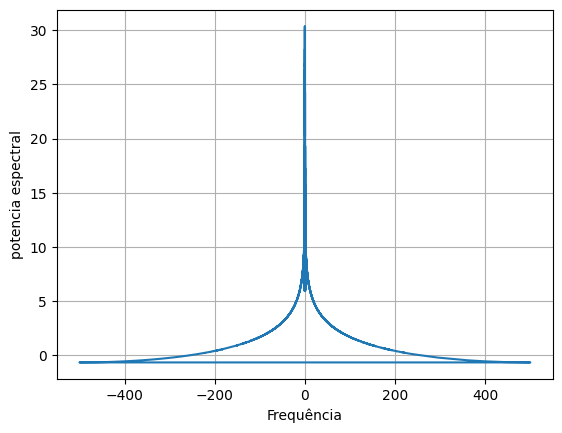

In [27]:
#gráfico log

plt.plot(xfreq,np.log(np.abs(xf)**2))
plt.xlabel('Frequência')
plt.ylabel("potencia espectral")
plt.grid(True)
plt.plot()

gráfico aplicando log em tudo

C:\Users\micka\AppData\Local\Temp\ipykernel_21432\2525826540.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(xfreq),np.log(np.abs(xf)**2))
C:\Users\micka\AppData\Local\Temp\ipykernel_21432\2525826540.py:1: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(xfreq),np.log(np.abs(xf)**2))


[]

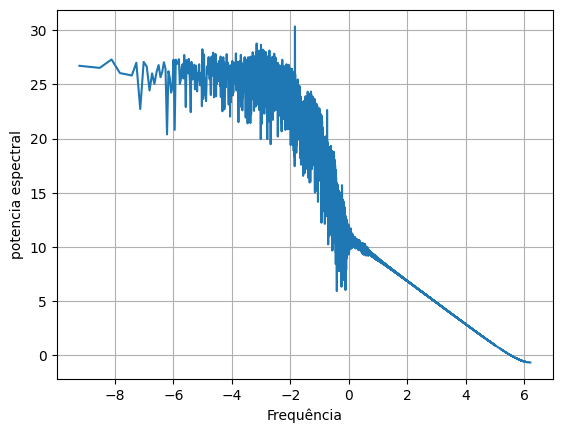

In [28]:
plt.plot(np.log(xfreq),np.log(np.abs(xf)**2))
plt.xlabel('Frequência')
plt.ylabel("potencia espectral")
plt.grid(True)
plt.plot()